# Apical vs Basal Coactivity Analysis

### Notebook for comparing activity and coactivity of spines on apical and basal dendrites
Loads in data previously analyzed in the Apical and Basal dedicated notebooks

In [1]:
# Configure Notebook width
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
# Import packages and modules
import os
import numpy as np
from Lab_Analyses.Spine_Analysis_v2 import spine_utilities as s_utils
from Lab_Analyses.Spine_Analysis_v2.spine_activity_dataclass import Grouped_Spine_Activity_Data
from Lab_Analyses.Spine_Analysis_v2.local_coactivity_dataclass import Grouped_Local_Coactivity_Data
from Lab_Analyses.Spine_Analysis_v2.dendritic_coactivity_dataclass import Grouped_Dendritic_Coactivity_Data
## plotting modules
from Lab_Analyses.Spine_Analysis_v2 import apical_vs_basal_plotting as plotting
from Lab_Analyses.Spine_Analysis_v2 import apical_vs_basal_plotting_v2 as plotting_v2
#%matplotlib ipympl
%matplotlib inline


C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
# Setup save path
## Set path the save figures in
figure_path = r"C:\Users\Jake\Desktop\Figures\grouped_data\Dual_Spine_Imaging\Coactivity_Plasticity\apical_vs_basal"
## Ensure the path exists
if not os.path.isdir(figure_path):
    os.makedirs(figure_path)

In [4]:
# Set up apical and basal mouse lists
id_1 = "JW082"
id_2 = "JW083" 
id_3 = "JW090"
id_4 = "JW092"
#id_5 = "JW126" # Not using
id_6 = "JW129" 
id_7 = "JW130" 
id_8 = "JW153"
id_9 = "JW150"
id_10 = "JW168"
id_11 = "JW202"



apical_mouse_list = [id_1, id_2, id_3, id_4, id_6, id_7, id_8, id_9, id_10, id_11]


id_2 = "JW153"
id_3 = "JW154"
id_4 = "JW167"
id_5 = "JW168"
id_6 = "JW169"
id_7 = "JW193"
id_8 = "JW205"
id_9 = "JW206"
id_10 = "JW213"
id_11 = "JW215"
id_12 = "JW270"
id_13 = "JW280" # Not sure going to use. Has lots of artifacts
id_14 = "JW306"

basal_mouse_list = [id_2, id_3, id_4, id_5, id_6, id_7, id_8, id_9, id_10, id_11, id_12, id_14]



## Basic Structural and Activity Properties

In [5]:
# Load the data
## Apical data
early_apical_activity_data = s_utils.batch_load_individual_analyzed_datasets(
    type="Activity",
    session="Early",
    norm=True,
    activity_type="dFoF",
    extended=None,
    mice_list=apical_mouse_list,
    fov_type="apical",
    period=None,
    partner=None,
)
early_apical_activity_data = Grouped_Spine_Activity_Data(early_apical_activity_data)
middle_apical_activity_data = s_utils.batch_load_individual_analyzed_datasets(
    type="Activity",
    session="Middle",
    norm=True,
    activity_type="dFoF",
    extended=None,
    mice_list=apical_mouse_list,
    fov_type="apical",
    period=None,
    partner=None,
)
middle_apical_activity_data = Grouped_Spine_Activity_Data(middle_apical_activity_data)
#late_apical_activity_data = s_utils.batch_load_individual_analyzed_datasets(
#    type="Activity",
#    session="Late",
#    norm=True,
#    activity_type="dFoF",
#    extended=None,
#    mice_list=apical_mouse_list,
#    fov_type="apical",
#    period=None,
#    partner=None,
#)
#late_apical_activity_data = Grouped_Spine_Activity_Data(late_apical_activity_data)
## Basal data
early_basal_activity_data = s_utils.batch_load_individual_analyzed_datasets(
    type="Activity",
    session="Early",
    norm=True,
    activity_type="dFoF",
    extended=None,
    mice_list=basal_mouse_list,
    fov_type="basal",
    period=None,
    partner=None,
)
early_basal_activity_data = Grouped_Spine_Activity_Data(early_basal_activity_data)
middle_basal_activity_data = s_utils.batch_load_individual_analyzed_datasets(
    type="Activity",
    session="Middle",
    norm=True,
    activity_type="dFoF",
    extended=None,
    mice_list=basal_mouse_list,
    fov_type="basal",
    period=None,
    partner=None,
)
middle_basal_activity_data = Grouped_Spine_Activity_Data(middle_basal_activity_data)
#late_basal_activity_data = s_utils.batch_load_individual_analyzed_datasets(
#    type="Activity",
#    session="Late",
#    norm=True,
#    activity_type="dFoF",
#    extended=None,
#    mice_list=basal_mouse_list,
#    fov_type="basal",
#    period=None,
#    partner=None,
#)
#late_basal_activity_data = Grouped_Spine_Activity_Data(late_basal_activity_data)
## Put into lists
#apical_activity_data_list = [early_apical_activity_data, middle_apical_activity_data, late_apical_activity_data]
#basal_activity_data_list = [early_basal_activity_data, middle_basal_activity_data, late_basal_activity_data]

In [ ]:
## Group data if desired
apical_grouped_activity_data = Grouped_Spine_Activity_Data(apical_activity_data_list)
basal_grouped_activity_data = Grouped_Spine_Activity_Data(basal_activity_data_list)

## Figure 1 - Longitudinal Structural Plasticity

In [ ]:
plotting_v2.plot_longitudinal_structural_plasticity(
    apical_datasets=apical_activity_data_list,
    basal_datasets=basal_activity_data_list,
    figsize=(9,8),
    threshold=(0.25, 0.5),
    showmeans=True,
    hist_bins=30,
    test_type="nonparametric",
    display_stats=True,
    save=True,
    save_path=figure_path,
)

## Figure 2 - Structural Plasticity

Apical Spines: 509
Basal Spines: 469
Apical LTP: 0.15601804360110863
Apical LTD: 0.22116659815677758
Apical Stable: 0.5777672032845881
Basal LTP: 0.1253389606336496
Basal LTD: 0.17811214032766484
Basal Stable: 0.6693994676729452


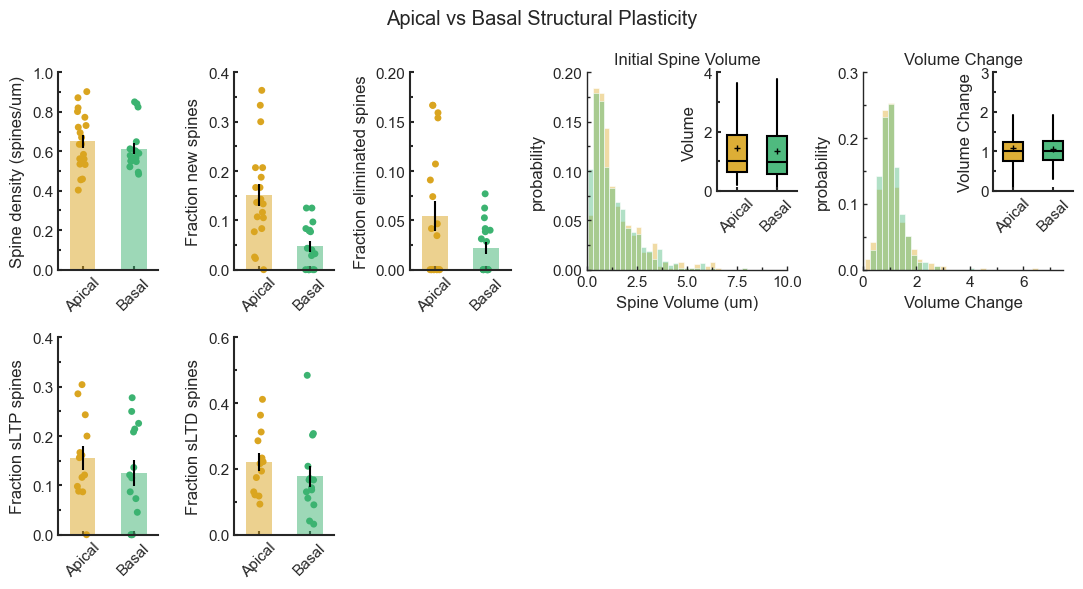

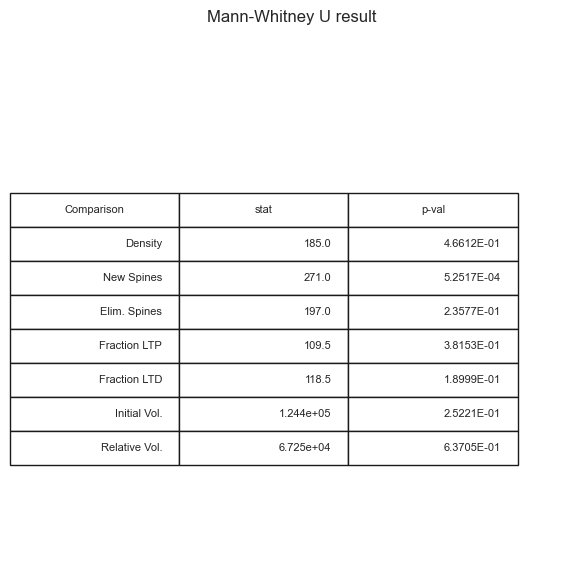

In [6]:
plotting_v2.plot_structural_plasticity(
    apical_dataset=early_apical_activity_data,
    basal_dataset=early_basal_activity_data,
    figsize=(11,6),
    threshold=(0.25, 0.5),
    showmeans=True,
    mean_type="mean",
    err_type="sem",
    hist_bins=30,
    test_type="nonparametric",
    display_stats=True,
    save=False,
    save_path=figure_path
)

## Figure 3 - Movement Related Activity

In [ ]:
plotting_v2.plot_movement_related_activity(
    apical_dataset=early_apical_activity_data,
    basal_dataset=early_basal_activity_data,
    MRSs=None,
    figsize=(9,7),
    hist_bins=30,
    showmeans=True,
    test_type="mixed-effect",
    test_method="holm-sidak",
    display_stats=True,
    save=False,
    save_path=figure_path,
)

## Figure 4 - Spine Movement Encoding

In [ ]:
plotting_v2.plot_spine_movement_encoding(
    apical_dataset=early_apical_activity_data,
    basal_dataset=early_basal_activity_data,
    MRSs=None,
    figsize=(10,4),
    showmeans=True,
    test_type="mixed-effect",
    test_method="holm-sidak",
    display_stats=True,
    save=False,
    save_path=figure_path,
)

## Local Synaptic Coactivity

In [ ]:
# Load the data
## Entire session
## Apical
e_apical_coactivity_data = s_utils.batch_load_individual_analyzed_datasets(
    type="Local",
    session="Early",
    norm=True,
    activity_type="dFoF",
    extended=None,
    mice_list=apical_mouse_list,
    fov_type="apical",
    period=None,
    partner=None,
)
e_apical_coactivity_data = Grouped_Local_Coactivity_Data(e_apical_coactivity_data)
m_apical_coactivity_data = s_utils.batch_load_individual_analyzed_datasets(
   type="Local",
   session="Middle",
   norm=True,
   activity_type="dFoF",
   extended=None,
   mice_list=apical_mouse_list,
   fov_type="apical",
   period=None,
   partner=None,
)
m_apical_coactivity_data = Grouped_Local_Coactivity_Data(m_apical_coactivity_data)
#l_apical_coactivity_data = s_utils.batch_load_individual_analyzed_datasets(
#    type="Local",
#    session="Late",
#    norm=True,
#    activity_type="dFoF",
#    extended=None,
#    mice_list=apical_mouse_list,
#    fov_type="apical",
#    period=None,
#    partner=None,
#)
#l_apical_coactivity_data = Grouped_Local_Coactivity_Data(l_apical_coactivity_data)
## Basal
e_basal_coactivity_data = s_utils.batch_load_individual_analyzed_datasets(
    type="Local",
    session="Early",
    norm=True,
    activity_type="dFoF",
    extended=None,
    mice_list=basal_mouse_list,
    fov_type="basal",
    period=None,
    partner=None,
)
e_basal_coactivity_data = Grouped_Local_Coactivity_Data(e_basal_coactivity_data)
m_basal_coactivity_data = s_utils.batch_load_individual_analyzed_datasets(
   type="Local",
   session="Middle",
   norm=True,
   activity_type="dFoF",
   extended=None,
   mice_list=basal_mouse_list,
   fov_type="basal",
   period=None,
   partner=None,
)
m_basal_coactivity_data = Grouped_Local_Coactivity_Data(m_basal_coactivity_data)
#l_basal_coactivity_data = s_utils.batch_load_individual_analyzed_datasets(
#    type="Local",
#    session="Late",
#    norm=True,
#    activity_type="dFoF",
#    extended=None,
#    mice_list=basal_mouse_list,
#    fov_type="basal",
#    period=None,
#    partner=None,
#)
#l_basal_coactivity_data = Grouped_Local_Coactivity_Data(l_basal_coactivity_data)

In [ ]:
## Group data if desired
apical_grouped_coactivity_data = Grouped_Local_Coactivity_Data([e_apical_coactivity_data, m_apical_coactivity_data])
basal_grouped_coactivity_data = Grouped_Local_Coactivity_Data([e_basal_coactivity_data, m_basal_coactivity_data])

## Figure 5 - Local Spine Coactivity

In [ ]:
plotting_v2.plot_local_coactivity(
    apical_dataset=e_apical_coactivity_data,
    basal_dataset=e_basal_coactivity_data,
    MRSs=None,
    figsize=(13,11),
    showmeans=True,
    mean_type="median",
    err_type="sem",
    hist_bins=50,
    test_type="mixed-effect",
    display_stats=True,
    save=False,
    save_path=figure_path
)

## Dendritic Coactivity

In [ ]:
## Load the data
## Apical
e_apical_global_data = s_utils.batch_load_individual_analyzed_datasets(
    type="Global",
    session="Early",
    norm=True,
    activity_type="dFoF",
    extended=None,
    mice_list=apical_mouse_list,
    fov_type="apical",
    period=None,
    partner=None,
)
e_apical_global_data = Grouped_Dendritic_Coactivity_Data(e_apical_global_data)
#m_apical_global_data = s_utils.batch_load_individual_analyzed_datasets(
#     type="Global",
#     session="Middle",
#     norm=True,
#     activity_type="dFoF",
#     extended=None,
#     mice_list=apical_mouse_list,
#     fov_type="apical",
#     period=None,
#     partner=None,
# )
# m_apical_global_data = Grouped_Dendritic_Coactivity_Data(m_apical_global_data)
# l_apical_global_data = s_utils.batch_load_individual_analyzed_datasets(
#     type="Global",
#     session="Late",
#     norm=True,
#     activity_type="dFoF",
#     extended=None,
#     mice_list=apical_mouse_list,
#     fov_type="apical",
#     period=None,
#     partner=None,
# )
# l_apical_global_data = Grouped_Dendritic_Coactivity_Data(l_apical_global_data)
## Basal
e_basal_global_data = s_utils.batch_load_individual_analyzed_datasets(
    type="Global",
    session="Early",
    norm=True,
    activity_type="dFoF",
    extended=None,
    mice_list=basal_mouse_list,
    fov_type="basal",
    period=None,
    partner=None,
)
e_basal_global_data = Grouped_Dendritic_Coactivity_Data(e_basal_global_data)
# m_basal_global_data = s_utils.batch_load_individual_analyzed_datasets(
#     type="Global",
#     session="Middle",
#     norm=True,
#     activity_type="dFoF",
#     extended=None,
#     mice_list=basal_mouse_list,
#     fov_type="basal",
#     period=None,
#     partner=None,
# )
# m_basal_global_data = Grouped_Dendritic_Coactivity_Data(m_basal_global_data)
# l_basal_global_data = s_utils.batch_load_individual_analyzed_datasets(
#     type="Global",
#     session="Late",
#     norm=True,
#     activity_type="dFoF",
#     extended=None,
#     mice_list=basal_mouse_list,
#     fov_type="basal",
#     period=None,
#     partner=None,
# )
# l_basal_global_data = Grouped_Dendritic_Coactivity_Data(l_basal_global_data)

In [ ]:
## Group data if desired
apical_grouped_global_data = Grouped_Spine_Coactivity_Data([e_apical_global_data, m_apical_global_data, l_apical_global_data])
basal_grouped_global_data = Grouped_Spine_Coactivity_Data([e_basal_global_data, m_basal_global_data, l_basal_global_data])

## Figure 6 - Dendritic Coactivity

In [ ]:
plotting_v2.plot_dendrite_coactivity(
    apical_dataset=e_apical_global_data,
    basal_dataset=e_basal_global_data,
    MRSs=None,
    figsize=(13,15),
    showmeans=True,
    hist_bins=30,
    test_type="mixed-effect",
    display_stats=True,
    save=False,
    save_path=figure_path,
)